In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras import regularizers
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.utils import plot_model
import matplotlib.pyplot as plt

2023-07-14 05:00:56.223313: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
(X_train, _), (X_test, _) = fashion_mnist.load_data()
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

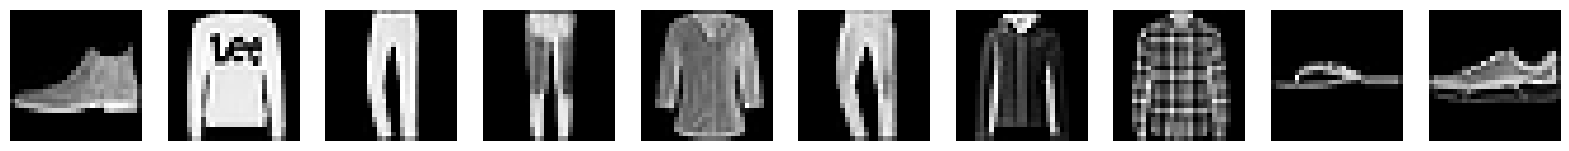

In [3]:
fig, ax = plt.subplots(1, 10, figsize=(20, 4))
for i in range(10):
    ax[i].imshow(X_test[i], cmap='gray')
    ax[i].axis("off")

In [4]:
X_train = X_train / 255.
X_test = X_test / 255.

In [5]:
X_train = X_train.reshape(-1, 28 * 28)
X_test = X_test.reshape(-1, 28 * 28)
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [6]:
input = Input(shape=(784,))
x = Dense(units=128, activation='relu')(input)
x = Dense(units=64, activation='relu')(x)
encoder = Dense(units=32, activation='relu')(x)

x = Dense(units=64, activation='relu')(encoder)
x = Dense(units=128, activation='relu')(x)
decoder = Dense(units=784, activation='sigmoid')(x) # using sigmoid because the values are from 0 to 1

encoder_model = Model(inputs=input, outputs=encoder)
autoencoder = Model(inputs=input, outputs=decoder)
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')

2023-07-14 05:01:13.655308: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 6638 MB memory:  -> device: 0, name: GeForce RTX 2070 SUPER, pci bus id: 0000:3f:00.0, compute capability: 7.5


In [7]:
autoencoder.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 64)                2112      
                                                                 
 dense_4 (Dense)             (None, 128)               8320      
                                                                 
 dense_5 (Dense)             (None, 784)               1011

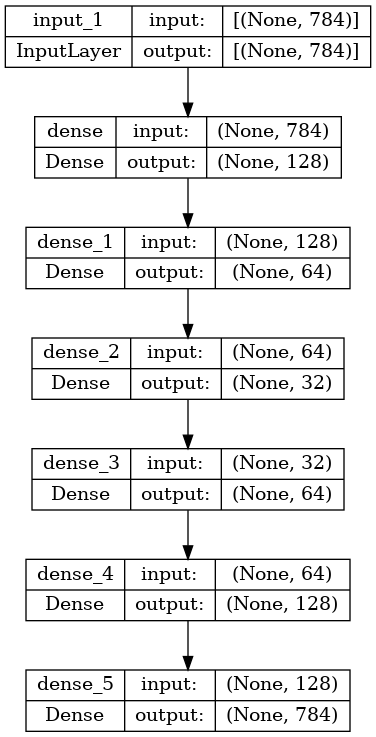

In [8]:
plot_model(autoencoder, show_shapes=True)

In [9]:
history = autoencoder.fit(X_train, X_train, epochs=50, 
                        shuffle=True, batch_size=256, validation_data=(X_test, X_test))

Epoch 1/50


2023-07-14 05:01:17.483134: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f0af83ed550 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-07-14 05:01:17.483196: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): GeForce RTX 2070 SUPER, Compute Capability 7.5
2023-07-14 05:01:17.489755: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-07-14 05:01:17.724139: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2023-07-14 05:01:17.916354: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


235/235 [==============================] - 6s 10ms/step - loss: 0.3761 - val_loss: 0.3186
Epoch 2/50
235/235 [==============================] - 2s 9ms/step - loss: 0.3099 - val_loss: 0.3064
Epoch 3/50
235/235 [==============================] - 2s 10ms/step - loss: 0.3009 - val_loss: 0.3001
Epoch 4/50
235/235 [==============================] - 2s 9ms/step - loss: 0.2960 - val_loss: 0.2962
Epoch 5/50
235/235 [==============================] - 2s 8ms/step - loss: 0.2930 - val_loss: 0.2934
Epoch 6/50
235/235 [==============================] - 2s 8ms/step - loss: 0.2903 - val_loss: 0.2914
Epoch 7/50
235/235 [==============================] - 2s 8ms/step - loss: 0.2885 - val_loss: 0.2896
Epoch 8/50
235/235 [==============================] - 2s 8ms/step - loss: 0.2870 - val_loss: 0.2886
Epoch 9/50
235/235 [==============================] - 2s 8ms/step - loss: 0.2857 - val_loss: 0.2872
Epoch 10/50
235/235 [==============================] - 2s 9ms/step - loss: 0.2847 - val_loss: 0.2866
Epoch 11

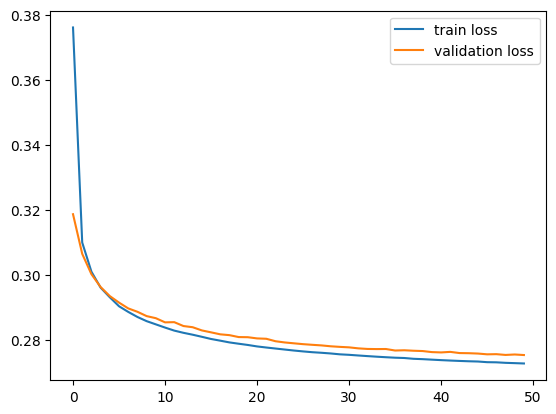

In [10]:
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='validation loss')
plt.legend()

In [12]:
X_test.shape

(10000, 784)

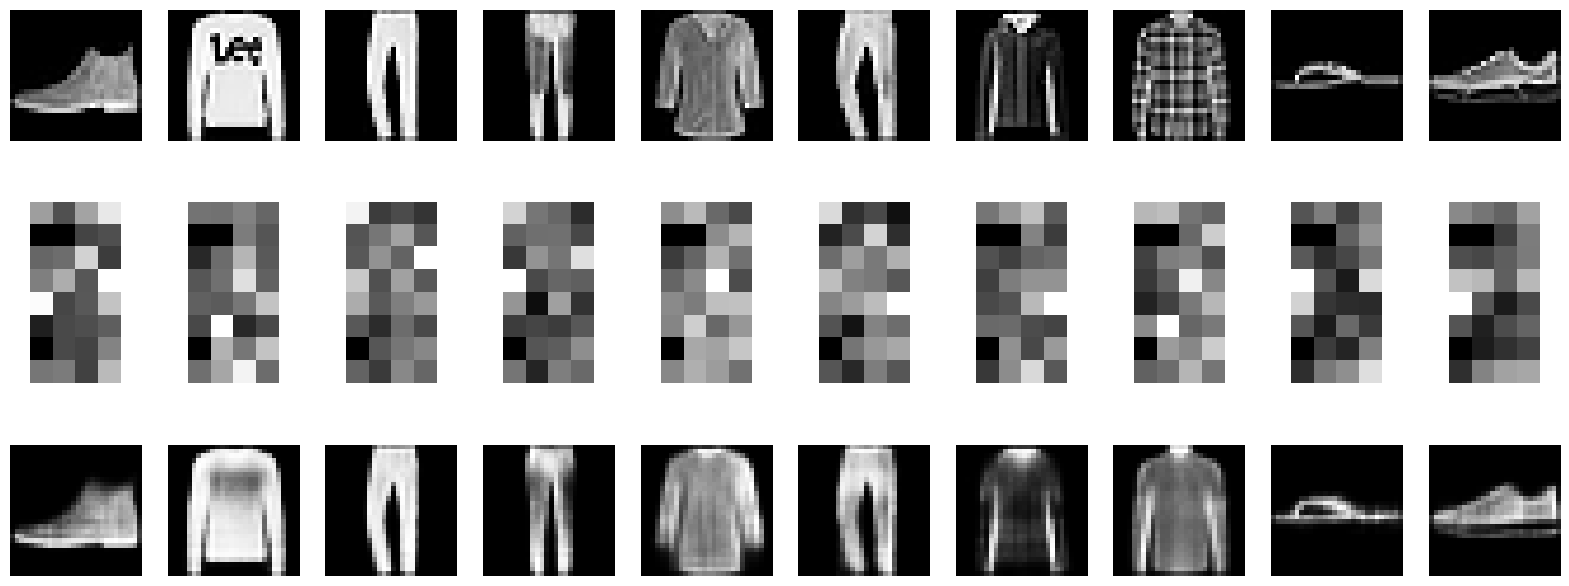

In [15]:
fig, ax = plt.subplots(3, 10, figsize=(20, 8))
for i in range(10):
    ax[0, i].imshow(X_test[i].reshape(28, 28), cmap='gray')
    ax[0, i].axis('off')
    img = np.expand_dims(X_test[i], axis=0)
    # img = X_test[np.newaxis, i]
    ax[1, i].imshow(encoder_model.predict(img, verbose=0).reshape(8, 4), cmap='gray')
    ax[1, i].axis('off')
    ax[2, i].imshow(autoencoder.predict(img, verbose=0).reshape(28, 28), cmap='gray')
    ax[2, i].axis('off')